# House Train 데이터 분석 (Analyst Phase)

## 0. 분석 개요
- **목적**: `house_train.csv` 데이터셋을 탐색하여 Target 변수(`SalePrice`)의 분포 특성을 파악하고, 주요 Feature와의 상관관계를 분석합니다.
- **방법론**: OSEMN (Obtain, Scrub, Explore, Model, Interpret) 프로세스
- **작성자**: Antigravity AI Agent

In [1]:
# 1. 라이브러리 임포트 및 설정 (Refiner 단계 선반영: 상수 분리)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 상수 정의 (Constants)
TARGET_COL = 'SalePrice'
TOP_CORR_N = 10  # 상관관계 높은 상위 N개 변수

# 시각화 설정
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 한글 폰트
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

print("라이브러리 로드 및 설정 완료")

라이브러리 로드 및 설정 완료


## 1. Obtain (데이터 확보)
데이터를 로드하고 기본 정보를 확인합니다.

In [2]:
# 데이터 로드 relative path
file_path = '../../data/house_train.csv'
df_train = pd.read_csv(file_path)

print(f"Data Shape: {df_train.shape}")
df_train.head()

Data Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 해석 (Interpret)
- 총 1460개의 샘플과 81개의 컬럼으로 구성되어 있습니다.
- `house_test.csv`와 달리 예측해야 할 **`SalePrice`** 컬럼이 존재합니다.

## 2. Scrub & Explore (Target 변수 분석)
모델 성능에 가장 큰 영향을 미치는 Target 변수(`SalePrice`)의 분포를 집중적으로 살펴봅니다.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


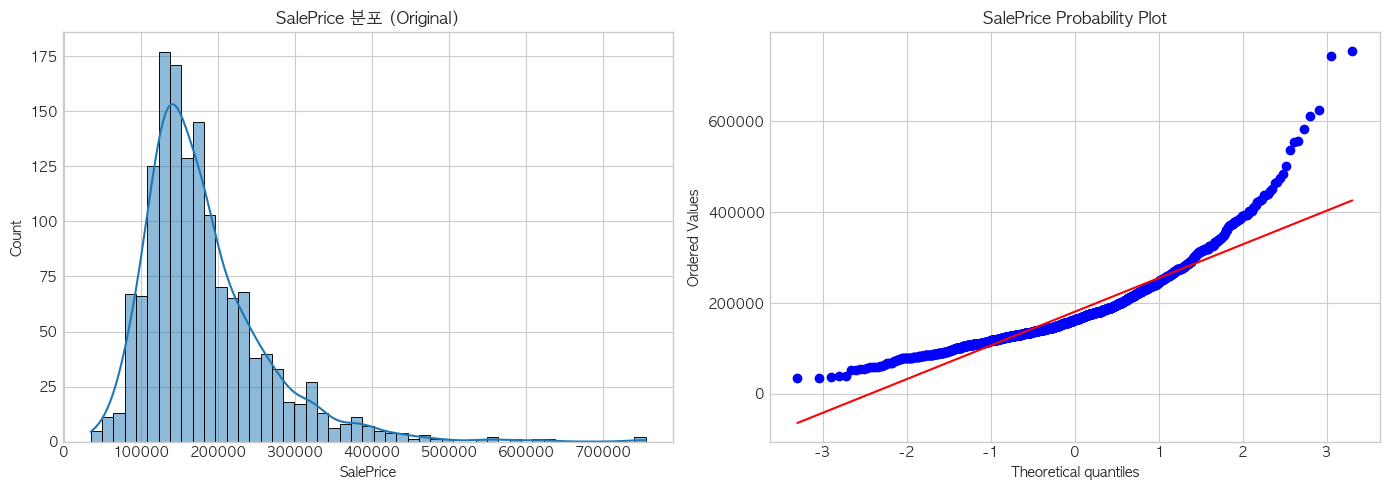

In [3]:
# Target 변수 기초 통계량
print(df_train[TARGET_COL].describe())

# 분포 시각화 (원본 vs 로그 변환)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 원본 분포
sns.histplot(df_train[TARGET_COL], kde=True, ax=ax[0])
ax[0].set_title(f'{TARGET_COL} 분포 (Original)')

# Q-Q Plot (정규성 확인)
res = stats.probplot(df_train[TARGET_COL], plot=ax[1])
ax[1].set_title(f'{TARGET_COL} Probability Plot')

plt.tight_layout()
plt.show()

### 해석 (Interpret)
- `SalePrice`는 왼쪽으로 치우치고 오른쪽 꼬리가 긴(Right Skewed) 분포를 보입니다.
- 회귀 모델은 종속 변수가 정규 분포를 따른다고 가정하는 경우가 많으므로, **로그 변환(Log Transformation)**이 강력히 권장됩니다.

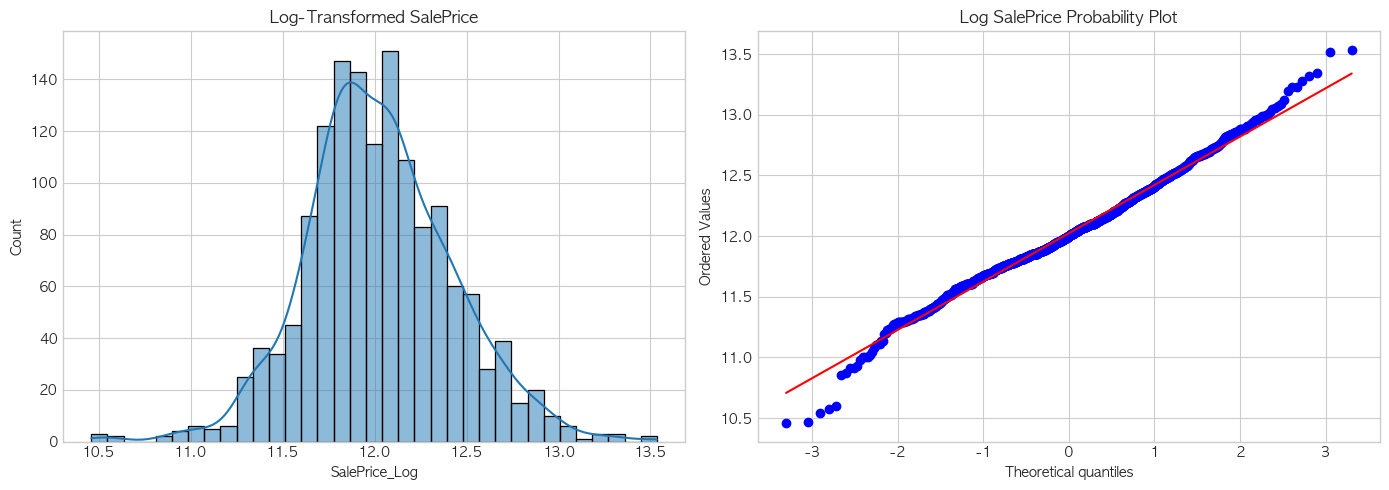

In [4]:
# 로그 변환 적용 및 확인
df_train['SalePrice_Log'] = np.log1p(df_train[TARGET_COL])

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_train['SalePrice_Log'], kde=True, ax=ax[0])
ax[0].set_title('Log-Transformed SalePrice')

stats.probplot(df_train['SalePrice_Log'], plot=ax[1])
ax[1].set_title('Log SalePrice Probability Plot')

plt.tight_layout()
plt.show()

### 해석 (Interpret)
- 로그 변환 후 분포가 훨씬 정규 분포에 가까워졌습니다. 모델 학습 시 이 변환된 값을 사용하는 것이 좋습니다.

## 3. Explore (상관관계 분석)
Target 변수와 가장 상관관계가 높은 Feature들을 찾아냅니다.

/Users/bagjongman/dev/workspace/study/python/study_machine_learning/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjongman/dev/workspace/study/python/study_machine_learning/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjongman/dev/workspace/study/python/study_machine_learning/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjongman/dev/workspace/study/python/study_machine_learning/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  fig.canvas.prin

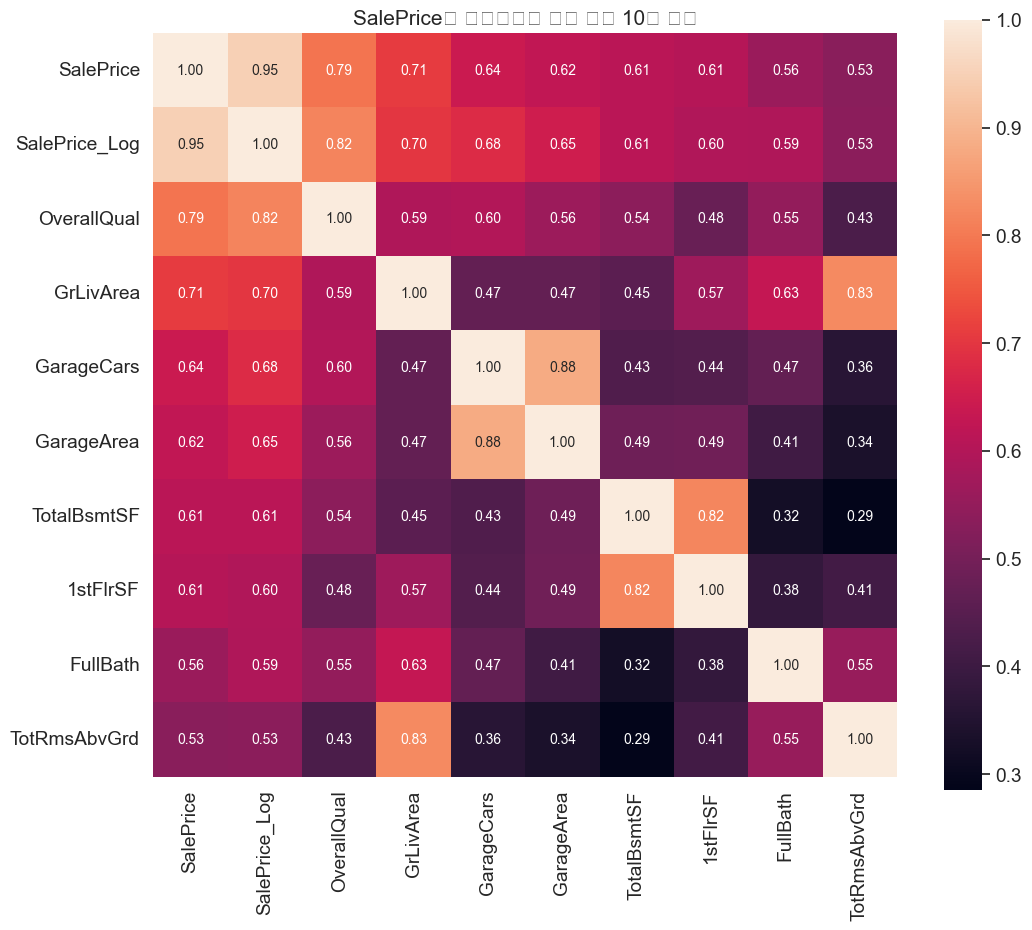

In [5]:
# 수치형 변수만 추출하여 상관계수 계산
numeric_features = df_train.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

# Target과 상관관계가 높은 상위 N개 변수 추출
cols = corr_matrix.nlargest(TOP_CORR_N, TARGET_COL)[TARGET_COL].index
cm = np.corrcoef(df_train[cols].values.T)

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values)
plt.title(f'{TARGET_COL}와 상관관계가 높은 상위 {TOP_CORR_N}개 변수')
plt.show()

### 해석 (Interpret)
- **`OverallQual` (0.79)**: 집의 전반적인 품질이 가격과 가장 강한 양의 상관관계를 가집니다.
- **`GrLivArea` (0.71)**: 지상 거주 면적 또한 매우 중요한 요소입니다.
- **`GarageCars` (0.64), `GarageArea` (0.62)**: 차고 관련 변수들도 가격 형성에 큰 영향을 미칩니다. (두 변수는 서로 다중공선성이 있을 수 있음)
- **`TotalBsmtSF` (0.61)**: 지하실 면적도 중요한 가격 결정 요인입니다.